In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [20]:
images = np.load("../images_CNN.npy")
print(images.shape)
labels = np.load("../labels_CNN.npy")
print(labels.shape)

(1272, 256, 256)
(1272,)


In [21]:
unique_labels, counts = np.unique(labels, return_counts=True)
unique_labels

array(['Cas', 'Gem', 'Ori', 'Per', 'ST', 'UM'], dtype='<U3')

In [24]:
label_mapping = {'Cas': 0, 'Gem': 1, 'Ori': 2, 'Per': 3, 'ST': 4, 'UM': 5}
labels_mapped = [label_mapping[label] for label in labels]
labels_encoded = to_categorical(labels_mapped, num_classes=6)
labels_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [25]:
images = images/255
images.max()

1.0

In [43]:
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
print(x_train.shape)
print(y_train.shape)

(1017, 256, 256)
(1017, 6)


In [56]:
model = keras.Sequential([
    layers.Input(shape=(256, 256, 1)),  

    layers.Conv2D(32, (11, 11), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 246, 246, 32)      3904      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 119, 119, 64)      51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 222784)            0         
                                                                 
 dense_12 (Dense)            (None, 128)              

overfitting?

In [57]:
model.fit(x_train, y_train, epochs=5, batch_size=32) 

Epoch 1/5
32/32 [==============================] - 136s 4s/step - loss: 0.4329 - accuracy: 0.3746
Epoch 2/5
32/32 [==============================] - 130s 4s/step - loss: 0.2104 - accuracy: 0.7424
Epoch 3/5
32/32 [==============================] - 130s 4s/step - loss: 0.0494 - accuracy: 0.9705
Epoch 4/5
32/32 [==============================] - 140s 4s/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 178s 6s/step - loss: 6.3117e-04 - accuracy: 1.0000


In [58]:
predicted_test_prob = model.predict(x_test)

8/8 [==============================] - 12s 1s/step


In [59]:
predicted_test_labels = np.argmax(predicted_test_prob, axis=1)

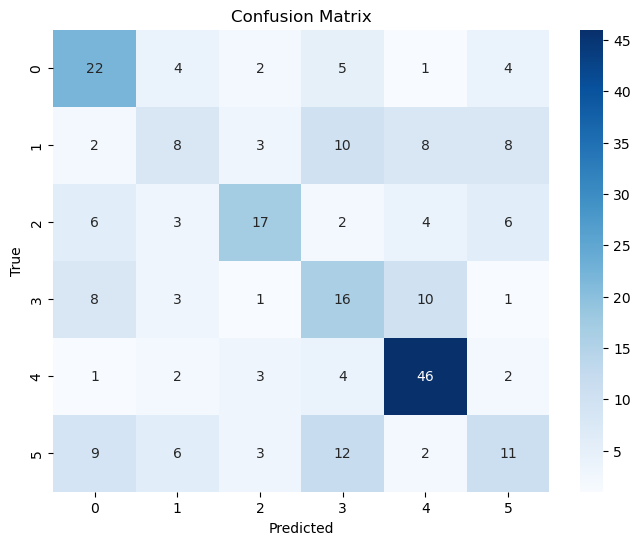

In [60]:
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51        38
           1       0.31      0.21      0.25        39
           2       0.59      0.45      0.51        38
           3       0.33      0.41      0.36        39
           4       0.65      0.79      0.71        58
           5       0.34      0.26      0.29        43

    accuracy                           0.47       255
   macro avg       0.45      0.45      0.44       255
weighted avg       0.46      0.47      0.46       255

